In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

In [2]:
#!pip install missingno

In [3]:
#!pip install eli5

In [4]:
df=pd.read_csv('data.csv')
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [5]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,18197,18198,18199,18200,18201,18202,18203,18204,18205,18206
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,18197,18198,18199,18200,18201,18202,18203,18204,18205,18206
ID,158023,20801,190871,193080,192985,183277,177003,176580,155862,200389,...,246167,242844,244677,231381,243413,238813,243165,241638,246268,246269
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne,E. Hazard,L. Modrić,L. Suárez,Sergio Ramos,J. Oblak,...,D. Holland,J. Livesey,M. Baldisimo,J. Young,D. Walsh,J. Lundstram,N. Christoffersson,B. Worman,D. Walker-Rice,G. Nugent
Age,31,33,26,27,27,27,32,31,32,25,...,18,18,18,18,18,19,19,16,17,16
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/players/4/19/183277.png,https://cdn.sofifa.org/players/4/19/177003.png,https://cdn.sofifa.org/players/4/19/176580.png,https://cdn.sofifa.org/players/4/19/155862.png,https://cdn.sofifa.org/players/4/19/200389.png,...,https://cdn.sofifa.org/players/4/19/246167.png,https://cdn.sofifa.org/players/4/19/242844.png,https://cdn.sofifa.org/players/4/19/244677.png,https://cdn.sofifa.org/players/4/19/231381.png,https://cdn.sofifa.org/players/4/19/243413.png,https://cdn.sofifa.org/players/4/19/238813.png,https://cdn.sofifa.org/players/4/19/243165.png,https://cdn.sofifa.org/players/4/19/241638.png,https://cdn.sofifa.org/players/4/19/246268.png,https://cdn.sofifa.org/players/4/19/246269.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GKHandling,11.0,11.0,9.0,85.0,13.0,12.0,9.0,25.0,8.0,92.0,...,6.0,52.0,7.0,15.0,10.0,13.0,9.0,5.0,6.0,15.0
GKKicking,15.0,15.0,15.0,87.0,5.0,6.0,7.0,31.0,9.0,78.0,...,9.0,58.0,9.0,12.0,9.0,7.0,9.0,10.0,14.0,9.0
GKPositioning,14.0,14.0,15.0,88.0,10.0,8.0,14.0,33.0,7.0,88.0,...,10.0,42.0,14.0,12.0,11.0,8.0,5.0,6.0,8.0,12.0
GKReflexes,8.0,11.0,11.0,94.0,13.0,8.0,9.0,37.0,11.0,89.0,...,15.0,48.0,15.0,11.0,13.0,9.0,12.0,13.0,9.0,9.0


In [6]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/1

In [7]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [8]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [10]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [11]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 85, dtype: int64

#### All the missing values from each column, we can see that the maximum number is 16943 for 'Loaned from' column. Well, lets try to reduce few records for the missing values.

In [12]:
for i in df.isnull().sum():
    print(i)

0
0
0
0
0
0
241
0
0
0
48
48
48
48
48
48
48
60
60
1553
16943
289
48
48
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
2085
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
1564


'1564' '48'

In [51]:
missing_height=df[df['Height'].isnull()].index.to_list()

In [14]:
if (df[df['Height'].isnull()].index.to_list() == df[df['Weight'].isnull()].index.to_list()):
    print('The records are same and go ahead to drop')
else:
    print('Not different')

The records are same and go ahead to drop


In [46]:
df.drop(df.index[missing_height],inplace =True)

In [47]:
df['Height']

0         5'7
1         6'2
2         5'9
3         6'4
4        5'11
         ... 
18202     5'9
18203     6'3
18204     5'8
18205    5'10
18206    5'10
Name: Height, Length: 18111, dtype: object

In [48]:
df.isnull().sum()

ID               0
Name             0
Age              0
Nationality      0
Overall          0
                ..
GKDiving         0
GKHandling       0
GKKicking        0
GKPositioning    0
GKReflexes       0
Length: 82, dtype: int64

As we can see, we guessed right and now we have fewer null values.

In [18]:
df.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

<a id="3"></a>
# Data Analysis

In [50]:
print(df['Nationality'].unique())
print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts())

['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'Greece' 'Chile' 'Sweden' 'Korea Republic' 'Finland' 'Guinea'
 'Montenegro' 'Armenia' 'Switzerland' 'Norway' 'Czech Republic' 'Scotland'
 'Ghana' 'Central African Rep.' 'DR Congo' 'Ivory Coast' 'Russia'
 'Ukraine' 'Iceland' 'Mexico' 'Jamaica' 'Albania' 'Venezuela' 'Japan'
 'Turkey' 'Ecuador' 'Paraguay' 'Mali' 'Nigeria' 'Cameroon'
 'Dominican Republic' 'Israel' 'Kenya' 'Hungary' 'Republic of Ireland'
 'Romania' 'United States' 'Cape Verde' 'Australia' 'Peru' 'Togo' 'Syria'
 'Zimbabwe' 'Angola' 'Burkina Faso' 'Iran' 'Estonia' 'Tunisia'
 'Equatorial Guinea' 'New Zealand' 'FYR Macedonia' 'United Arab Emirates'
 'China PR' 'Guinea Bissau' 'Bulgaria' 'Kosovo' 'South Africa'
 'Madagascar' 'Georgia' 'Tanzania' 'Ga

In [52]:
#Total number of clubs present and top 5 clubs with highest number of players
print('Total number of clubs : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts())

Total number of clubs : 651
FC Barcelona               33
Wolverhampton Wanderers    33
RC Celta                   33
Eintracht Frankfurt        33
Burnley                    33
                           ..
Ceará Sporting Club        20
Atlético Paranaense        20
Sligo Rovers               19
Limerick FC                19
Derry City                 18
Name: Club, Length: 651, dtype: int64


In [70]:
#Player with maximum Potential and Overall Performance
print('\nMaximum Potential : '+str(df.loc[df['Potential'].idxmax()]))
print('*'*100)
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()]))


Maximum Potential : ID                  231747
Name             K. Mbappé
Age                     19
Nationality         France
Overall                 88
                   ...    
GKDiving              13.0
GKHandling             5.0
GKKicking              7.0
GKPositioning         11.0
GKReflexes             6.0
Name: 25, Length: 82, dtype: object
****************************************************************************************************
Maximum Overall Perforamnce : ID                  158023
Name              L. Messi
Age                     31
Nationality      Argentina
Overall                 94
                   ...    
GKDiving               6.0
GKHandling            11.0
GKKicking             15.0
GKPositioning         14.0
GKReflexes             8.0
Name: 0, Length: 82, dtype: object


In [73]:
Considered_qualities=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print('BEST IN DIFFERENT ASPECTS :')
print('_________________________\n\n')
i=0
while i < len(Considered_qualities):
    print('Amazing {0} : {1}'.format(Considered_qualities[i],df.loc[df[Considered_qualities[i]].idxmax()][1]))
    i += 1

BEST IN DIFFERENT ASPECTS :
_________________________


Amazing Crossing : K. De Bruyne
Amazing Finishing : L. Messi
Amazing HeadingAccuracy : Naldo
Amazing ShortPassing : L. Modrić
Amazing Volleys : E. Cavani
Amazing Dribbling : L. Messi
Amazing Curve : Quaresma
Amazing FKAccuracy : L. Messi
Amazing LongPassing : T. Kroos
Amazing BallControl : L. Messi
Amazing Acceleration : Douglas Costa
Amazing SprintSpeed : K. Mbappé
Amazing Agility : Neymar Jr
Amazing Reactions : Cristiano Ronaldo
Amazing Balance : Bernard
Amazing ShotPower : Cristiano Ronaldo
Amazing Jumping : Cristiano Ronaldo
Amazing Stamina : N. Kanté
Amazing Strength : A. Akinfenwa
Amazing LongShots : L. Messi
Amazing Aggression : B. Pearson
Amazing Interceptions : N. Kanté
Amazing Positioning : Cristiano Ronaldo
Amazing Vision : L. Messi
Amazing Penalties : M. Balotelli
Amazing Composure : L. Messi
Amazing Marking : A. Barzagli
Amazing StandingTackle : G. Chiellini
Amazing SlidingTackle : Sergio Ramos
Amazing GKDiving : De G

In [23]:
#Cleaning some of values so that we can interpret them 
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

In [24]:
df.head().T

,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Overall,94,94,92,91,91
...,...,...,...,...,...
GKDiving,6.0,7.0,9.0,90.0,15.0
GKHandling,11.0,11.0,9.0,85.0,13.0
GKKicking,15.0,15.0,15.0,87.0,5.0
GKPositioning,14.0,14.0,15.0,88.0,10.0


In [25]:
#Top earners
print('Most valued player : '+str(df.loc[df['Value'].idxmax()][1]))
print('Highest earner : '+str(df.loc[df['Wage'].idxmax()][1]))
print("--"*40)
print("\nTop Earners")

Most valued player : Neymar Jr
Highest earner : L. Messi
--------------------------------------------------------------------------------

Top Earners


<a id="4"></a> <br>
# 4. Exploratory Data Analysis

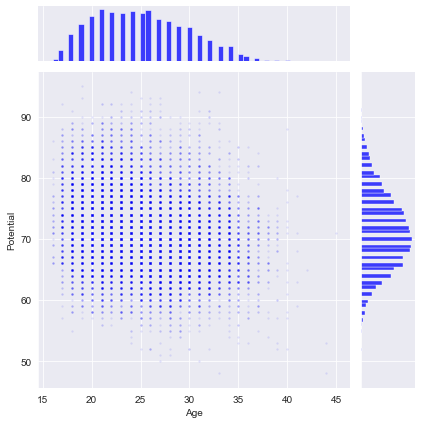

In [87]:
sns.jointplot(x=df['Age'],y=df['Potential'],joint_kws={'alpha':0.1,'s':5,'color':'blue'},marginal_kws={'color':'blue'})

`Potential` tends to fall as you grow old

Source of below visualisations: [fifa19-analysis](https://www.kaggle.com/dczerniawko/fifa19-analysis)

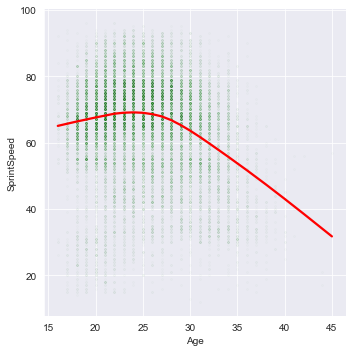

In [88]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'},line_kws={'color':'red'})

As the `age` increases the `sprint speed` decreases

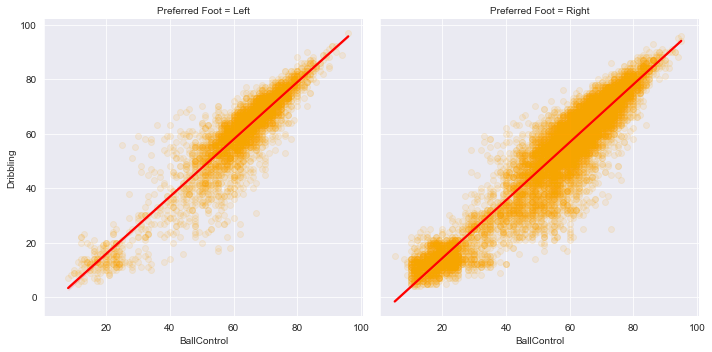

In [28]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})

`Left Footed Players` vs `Right Footed Players`

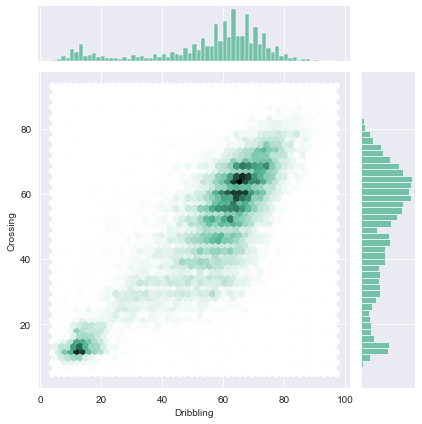

In [29]:

sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="#4CB391");

`Crossing` vs `Dribbling`

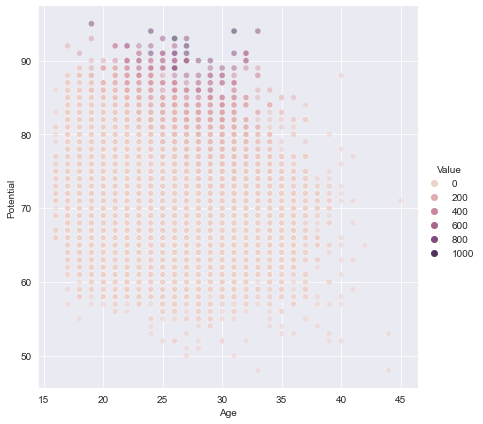

In [30]:
value = df.Value
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value/100000, 
            sizes=(40, 400), alpha=.5,
            height=6, data=df);

Relation between `potential` and `age` with respected `value` of players

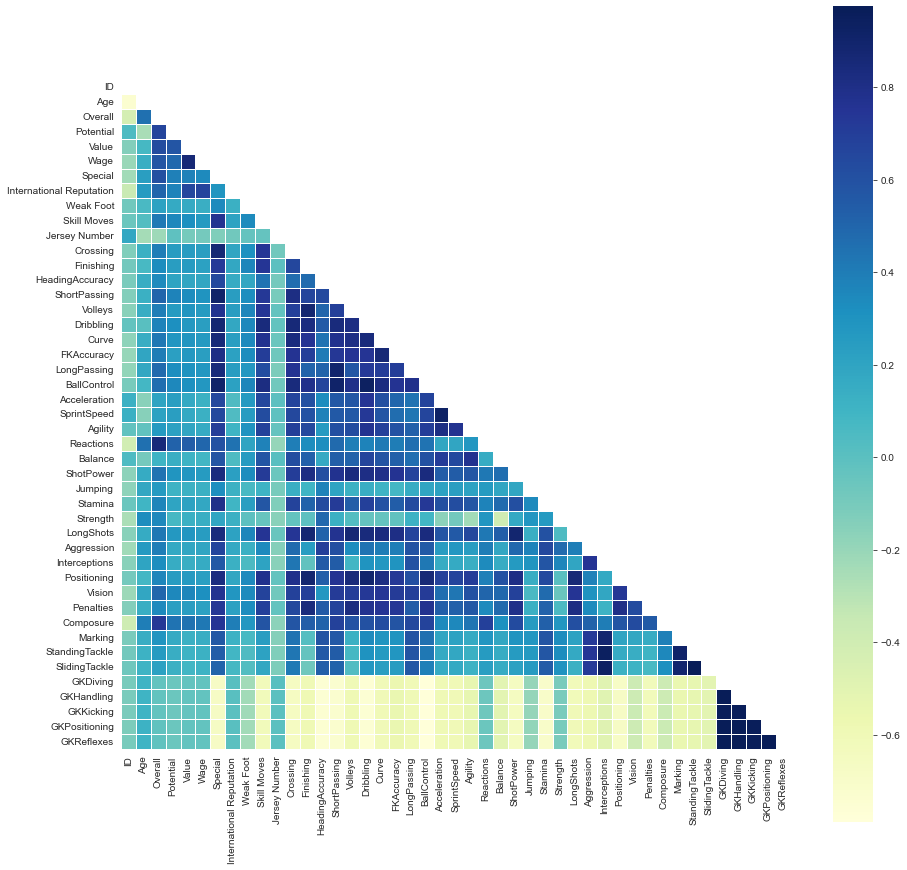

In [31]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")

**Lowest correlation** among the goalkeeping side with other columns and high among themselves 

**High correlation** between `Dribbling`, `Volleys`, `Passing` etc...

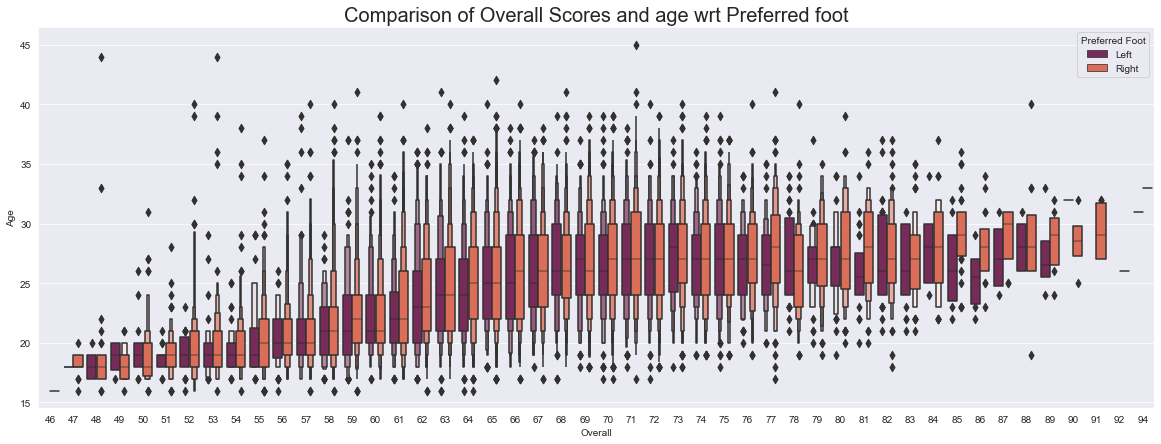

In [32]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df['Overall'], df['Age'], hue = df['Preferred Foot'], palette = 'rocket')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

We will have comparisions for `Age`, `Overall`, `Potential`, `Accelaration`, `SprintSpeed`, `Agility` , `Stamina`, `Strength`